# DATA Loading

In [1]:
import numpy as np

def load_data():
    data = np.loadtxt("./Salary_Data.csv", delimiter=',', skiprows=1)
    X = data[:,0]
    y = data[:,1]
    return X, y

x_train, y_train = load_data()


In [3]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [1.1 1.3 1.5 2.  2.2]


In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [39343. 46205. 37731. 43525. 39891.]


In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (30,)
The shape of y_train is:  (30,)
Number of training examples (m): 30


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter Plot

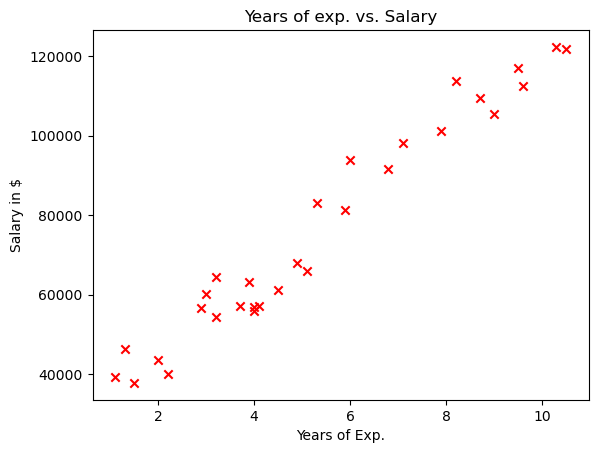

In [7]:

plt.scatter(x_train, y_train, marker='x', c='r') 


plt.title("Years of exp. vs. Salary")

plt.xlabel('Years of Exp.')
plt.ylabel('Salary in $')
plt.show()

# Linear Regression

In [8]:

def compute_cost(x, y, w, b): 

    m = x.shape[0] 
    
   
    total_cost = 0


    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    


    return total_cost

In [9]:
# Compute cost with some initial values for paramaters w, b
initial_w = 0
initial_b = 0

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')


<class 'numpy.float64'>
Cost at initial w (zeros): 3251477635.367


# Gradient Descent

In [10]:

def compute_gradient(x, y, w, b): 

    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    

        
    return dj_dw, dj_db

In [11]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -477398.7 -76003.0


In [12]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -477390.434 -76001.73733333334


# Learning parameter using batch gradient

In [13]:
import copy
import math

In [14]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    
    m = len(x)
    
    J_history = []
    p_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, p_history #return w and J,w history for graphing

In [15]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 1344612525.84   
Iteration  150: Cost 48111733.18   
Iteration  300: Cost 32841618.72   
Iteration  450: Cost 24751407.82   
Iteration  600: Cost 20465158.85   
Iteration  750: Cost 18194274.89   
Iteration  900: Cost 16991145.05   
Iteration 1050: Cost 16353718.66   
Iteration 1200: Cost 16016005.80   
Iteration 1350: Cost 15837083.22   
w,b found by gradient descent: 9597.791052916133 24796.02161349117


In [16]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Years of Exp.')

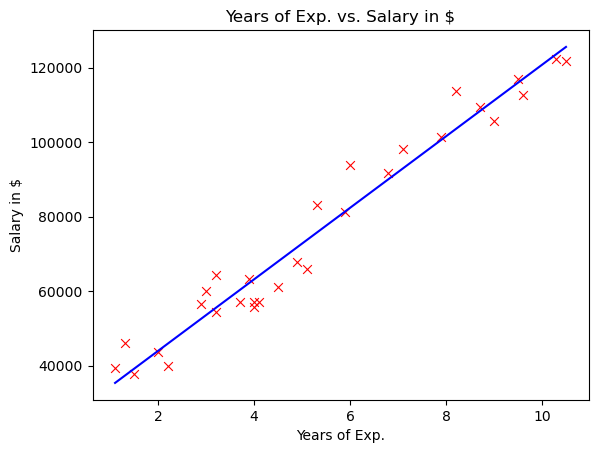

In [17]:
plt.plot(x_train, predicted, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r',s=40,linewidth=0.8) 

plt.title("Years of Exp. vs. Salary in $")
plt.ylabel('Salary in $')
plt.xlabel('Years of Exp.')

# Experiment with alpha (the learning rate)

In [19]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_divergence

In [19]:
# initialize parameters
initial_w = 0
initial_b = 0
# some gradient descent settings
# alpha is small
iterations = 1500
alpha = 1.0e-2

In [20]:
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost 1344612525.84   
Iteration  150: Cost 48111733.18   
Iteration  300: Cost 32841618.72   
Iteration  450: Cost 24751407.82   
Iteration  600: Cost 20465158.85   
Iteration  750: Cost 18194274.89   
Iteration  900: Cost 16991145.05   
Iteration 1050: Cost 16353718.66   
Iteration 1200: Cost 16016005.80   
Iteration 1350: Cost 15837083.22   


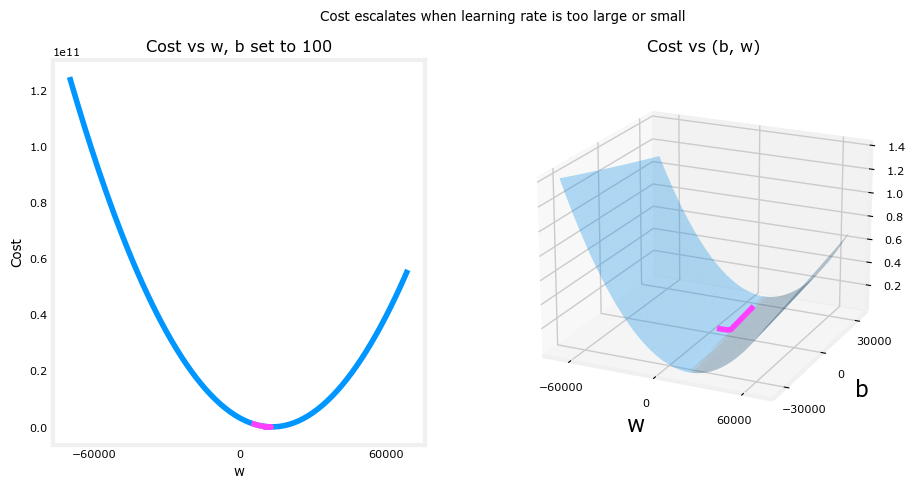

In [21]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

### in above example solutions converges nicely, now let's see how path looks after increasing alpha

Iteration    0: Cost 22882343976.46   
Iteration    1: Cost 163949244858.64   
Iteration    2: Cost 1177552442923.57   
Iteration    3: Cost 8460465246082.24   


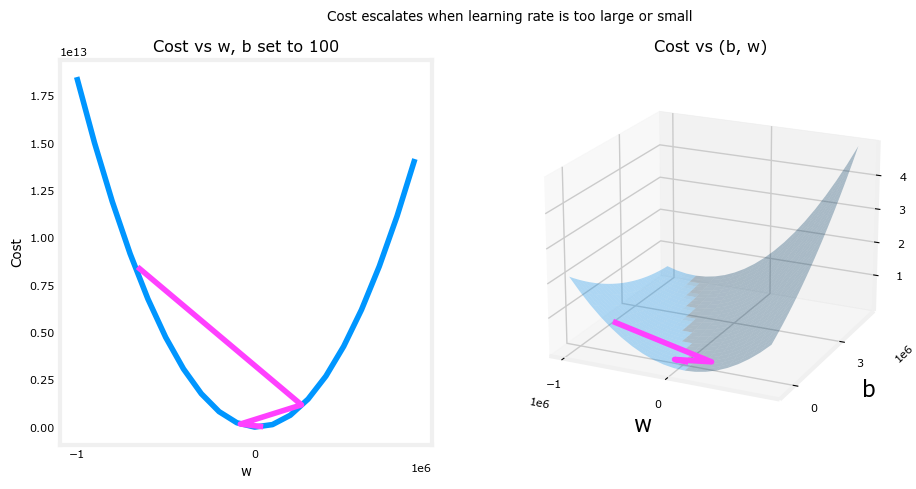

In [18]:
# initialize parameters
initial_w = 0
initial_b = 0
# some gradient descent settings
# alpha is large
iterations = 4
alpha = 1.0e-1

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)

plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()